In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")  
from scipy.stats import chi2_contingency 
from scipy.stats import ttest_ind

In [6]:
sns.set_style("whitegrid")
sns.set_theme(style="dark")
plt.style.use('Solarize_Light2')

In [7]:
df = pd.read_csv("../DOC/datos_limpios_final.csv", index_col = 0)

In [8]:
def asignar_grupos(valor):
    if valor >= 3:
        return "Group A"
    else:
        return "Group B"

df['job_satisfaction2'] = df['job_satisfaction'].map(asignar_grupos)
df['environment_satisfaction2'] = df['environment_satisfaction'].map(asignar_grupos)
df['work_life_balance2'] = df['work_life_balance'].map(asignar_grupos)


In [9]:
def asignar_grupos2(valor_años, valor_salario):
    mediana_años = df['years_since_last_promotion'].median()
    mediana_salario = df['hourly_rate'].median()
    if valor_años >= mediana_años:
        return "Group A"
    if valor_salario >= mediana_salario:
        return "Group A"
    else:
        return "Group B"

df['years_since_last_promotion2'] = df['years_since_last_promotion'].map(asignar_grupos)
df['hourly_rate2'] = df['hourly_rate'].map(asignar_grupos)

In [10]:
def porcentaje_ido(df, columnas):
    resultados = {}
    for columna in columnas:
        empleados_por_grupo = df.groupby(columna).size()
        empleados_idos_por_grupo = df[df['attrition'] == 'Y'].groupby(columna).size()
        tasa_rotacion_por_grupo = (empleados_idos_por_grupo / empleados_por_grupo) * 100
        resultados[columna] = tasa_rotacion_por_grupo
    
    return resultados


# Tamara barras dobles 

In [11]:
# Suponiendo que 'df' es tu DataFrame y 'columnas' es una lista de columnas sobre las que quieres calcular la tasa de rotación
columnas = ['years_since_last_promotion2', 'hourly_rate2', 'job_satisfaction2','work_life_balance2','environment_satisfaction2']
resultado_tasa_rotacion = porcentaje_ido(df, columnas)
print(resultado_tasa_rotacion)
print('------------------------------')


{'years_since_last_promotion2': years_since_last_promotion2
Group A    14.252336
Group B    16.694772
dtype: float64, 'hourly_rate2': hourly_rate2
Group A    16.047088
dtype: float64, 'job_satisfaction2': job_satisfaction2
Group A    13.668342
Group B    19.870759
dtype: float64, 'work_life_balance2': work_life_balance2
Group A    14.710884
Group B    19.634703
dtype: float64, 'environment_satisfaction2': environment_satisfaction2
Group A    13.395639
Group B    19.969278
dtype: float64}
------------------------------


# Patricia porcentajes

In [12]:
# Calculamos el porcentaje años que llevan los empleados en la compañía:
recuentos = df["years_at_company"].value_counts()
porcentajes = recuentos * 100 / len(df)
print(porcentajes)

df_antiguedad = pd.DataFrame({'Recuentos':recuentos, 'Porcentajes': porcentajes})
df_antiguedad.reset_index(inplace=True)
df_antiguedad.rename(columns={'index':'Años en la compañía'}, inplace=True)
df_antiguedad

5     12.887237
1     10.594796
3      8.736059
2      8.736059
10     8.240397
7      7.125155
4      7.063197
8      6.567534
9      5.824040
6      4.832714
0      2.726146
11     2.230483
20     1.796778
13     1.610905
15     1.301115
14     1.177200
22     1.053284
12     0.929368
18     0.929368
16     0.867410
21     0.867410
19     0.743494
17     0.557621
24     0.433705
25     0.309789
33     0.309789
26     0.247831
32     0.185874
27     0.185874
31     0.185874
36     0.185874
29     0.123916
23     0.123916
40     0.123916
34     0.061958
37     0.061958
30     0.061958
Name: years_at_company, dtype: float64


,Años en la compañía,Recuentos,Porcentajes
0,5,208,12.887237
1,1,171,10.594796
2,3,141,8.736059
3,2,141,8.736059
4,10,133,8.240397
5,7,115,7.125155
6,4,114,7.063197
7,8,106,6.567534
8,9,94,5.824040
9,6,78,4.832714


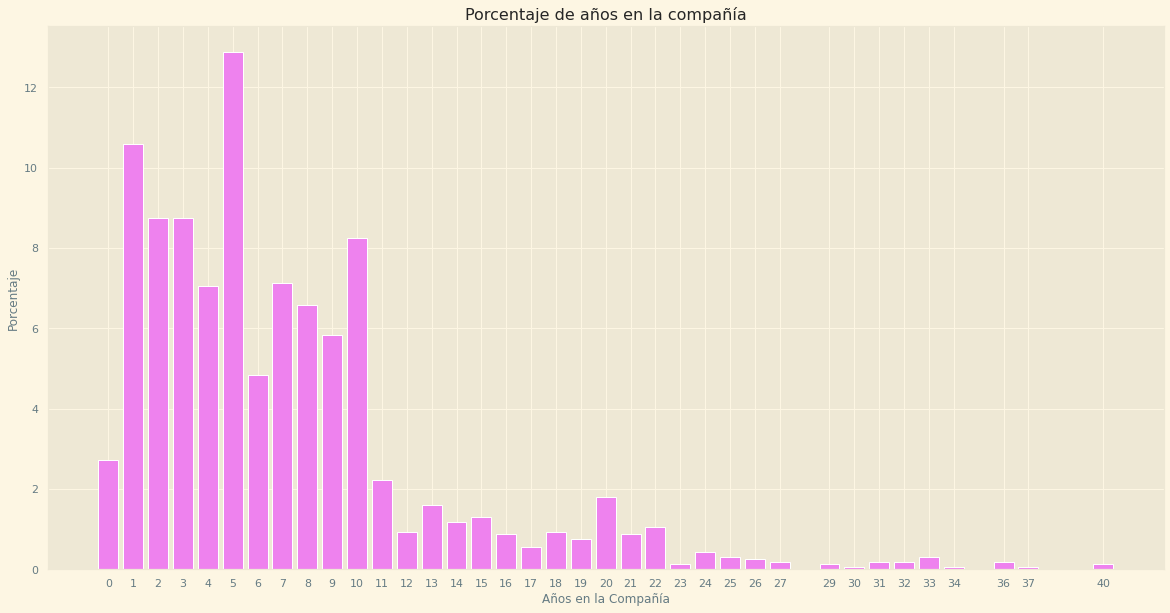

In [13]:
# Gráfica de resultados porcentaje antiguedad
plt.figure(figsize=(20, 10))
plt.bar(df_antiguedad['Años en la compañía'], df_antiguedad['Porcentajes'],color = 'violet')
plt.xlabel('Años en la Compañía')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de años en la compañía')
plt.xticks(df_antiguedad['Años en la compañía']);

In [14]:
# Calcula los recuentos de valores únicos
recuentos = df["years_since_last_promotion"].value_counts()
# Calcula los porcentajes
porcentajes = recuentos * 100 / len(df)
print(porcentajes)

0     38.723668
1     23.791822
2     10.966543
7      5.762082
4      4.151177
3      3.841388
5      3.283767
6      2.292441
11     1.610905
8      1.239157
9      1.115242
15     0.929368
12     0.681537
13     0.619579
14     0.619579
10     0.371747
Name: years_since_last_promotion, dtype: float64


In [16]:
# Calculamos el porcentaje de años desde la última promoción:
recuentos = df["years_since_last_promotion"].value_counts()
# Calcula los porcentajes
porcentajes = recuentos * 100 / len(df)
print(porcentajes)

df_promocion = pd.DataFrame({'Recuentos':recuentos, 'Porcentajes': porcentajes})
df_promocion.reset_index(inplace=True)
df_promocion.rename(columns={'index':'Años última promoción'}, inplace=True)
df_promocion

0     38.723668
1     23.791822
2     10.966543
7      5.762082
4      4.151177
3      3.841388
5      3.283767
6      2.292441
11     1.610905
8      1.239157
9      1.115242
15     0.929368
12     0.681537
13     0.619579
14     0.619579
10     0.371747
Name: years_since_last_promotion, dtype: float64


,Años última promoción,Recuentos,Porcentajes
0,0,625,38.723668
1,1,384,23.791822
2,2,177,10.966543
3,7,93,5.762082
4,4,67,4.151177
5,3,62,3.841388
6,5,53,3.283767
7,6,37,2.292441
8,11,26,1.610905
9,8,20,1.239157


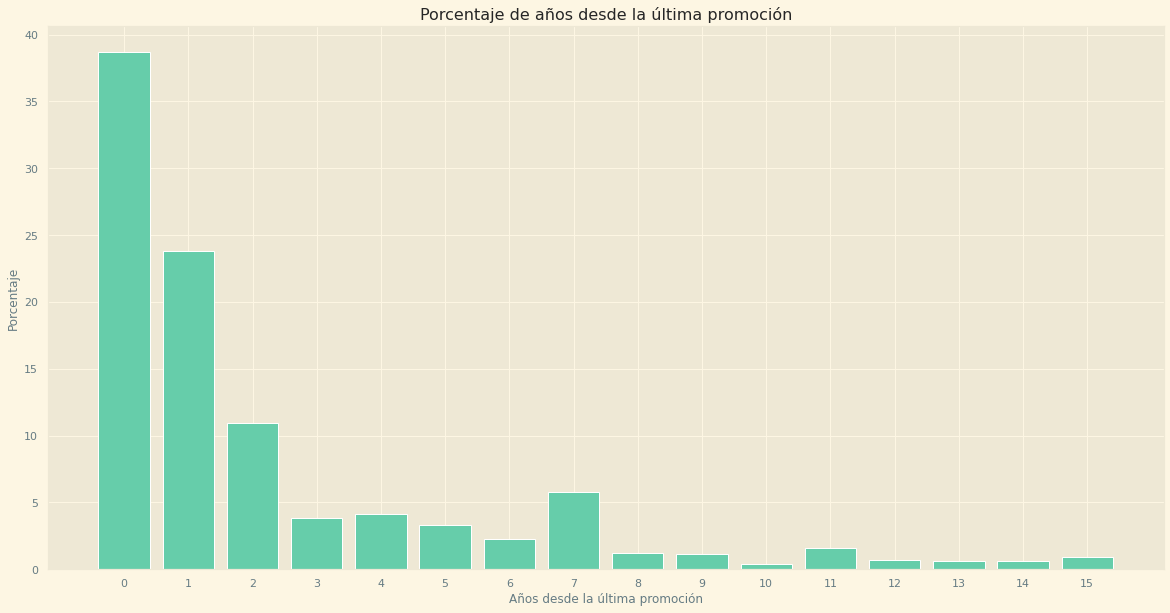

In [17]:
# Gráfica de resultados porcentaje promoción
plt.figure(figsize=(20, 10))
plt.bar(df_promocion['Años última promoción'], df_promocion['Porcentajes'],color = 'mediumaquamarine')
plt.xlabel('Años desde la última promoción')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de años desde la última promoción')
plt.xticks(df_promocion['Años última promoción']);

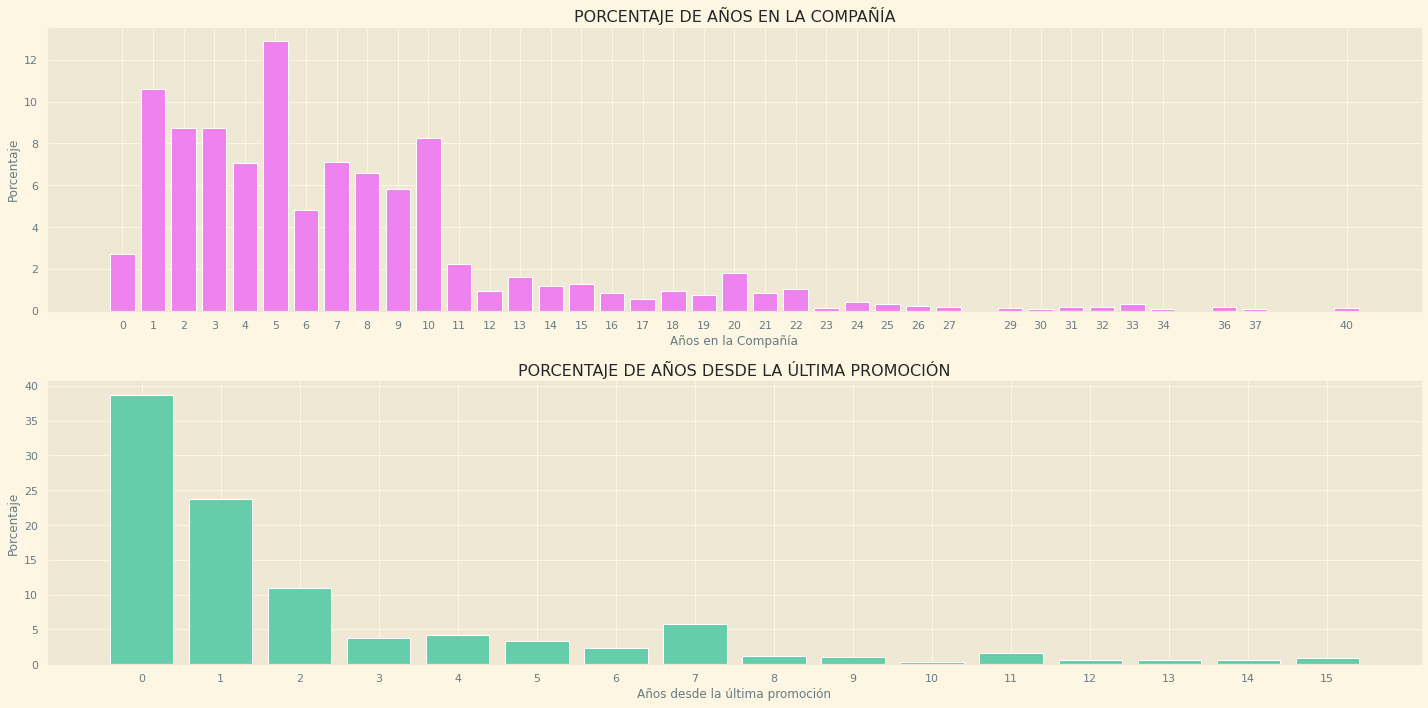

In [32]:
#Gráficas juntas
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

# Gráfica de resultados porcentaje antiguedad
axes[0].bar(df_antiguedad['Años en la compañía'], df_antiguedad['Porcentajes'], color='violet')
axes[0].set_xlabel('Años en la Compañía')
axes[0].set_ylabel('Porcentaje')
axes[0].set_title('PORCENTAJE DE AÑOS EN LA COMPAÑÍA')
axes[0].set_xticks(df_antiguedad['Años en la compañía'])

# Gráfica de resultados porcentaje promoción
axes[1].bar(df_promocion['Años última promoción'], df_promocion['Porcentajes'], color='mediumaquamarine')
axes[1].set_xlabel('Años desde la última promoción')
axes[1].set_ylabel('Porcentaje')
axes[1].set_title('PORCENTAJE DE AÑOS DESDE LA ÚLTIMA PROMOCIÓN')
axes[1].set_xticks(df_promocion['Años última promoción']);

plt.tight_layout()

# Hasta aqui Patricia

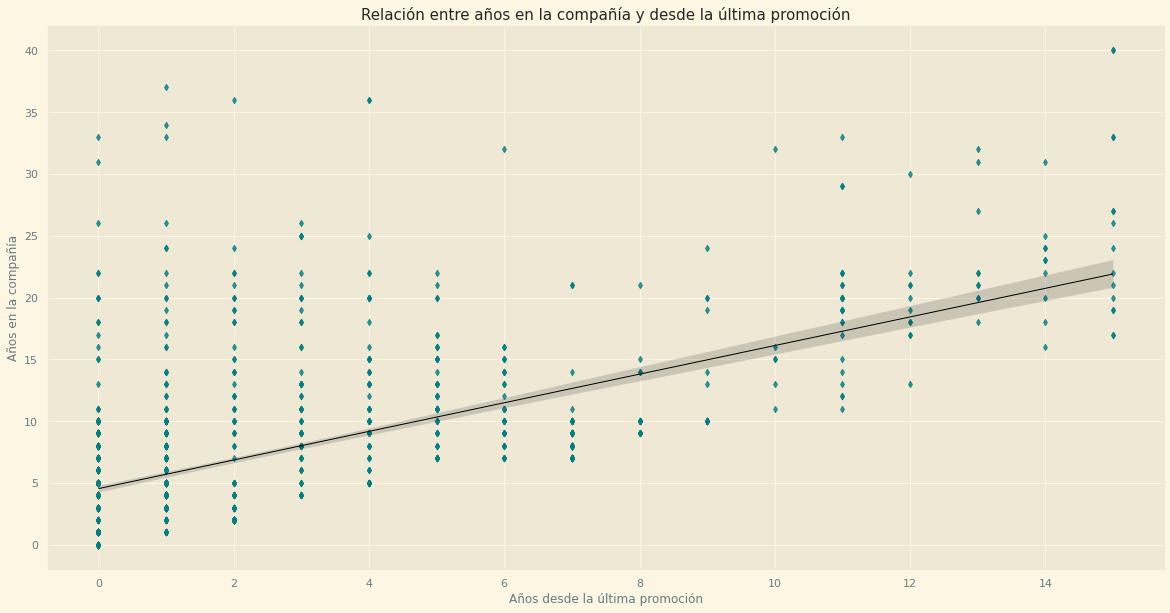

In [18]:
#fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
plt.figure(figsize=(20, 10))

sns.regplot(x = "years_since_last_promotion", 
            y = "years_at_company", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 20}, # cambiamos el color y el tamaño de los puntos del scaterplot
            #ax = axes[0] # especificamos el eje en el que queremos poner la gráfica. En este caso en el eje 0. 
            );


# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Años desde la última promoción", fontsize = 12)
plt.ylabel("Años en la compañía", fontsize = 12)
# ponemos título a la gráfica
plt.title("Relación entre años en la compañía y desde la última promoción", fontsize = 15);



In [19]:
df.dtypes

age                              int64
attrition                       object
distance_from_home             float64
education                        int64
environment_satisfaction         int64
gender                          object
job_involvement                  int64
job_level                        int64
job_role                        object
job_satisfaction                 int64
marital_status                  object
monthly_rate                     int64
num_companies_worked             int64
percent_salary_hike              int64
performance_rating             float64
relationship_satisfaction        int64
stock_option_level               int64
total_working_years            float64
training_times_last_year         int64
work_life_balance              float64
years_at_company                 int64
years_since_last_promotion       int64
years_with_curr_manager          int64
remote_work                     object
hourly_rate                    float64
job_satisfaction2        

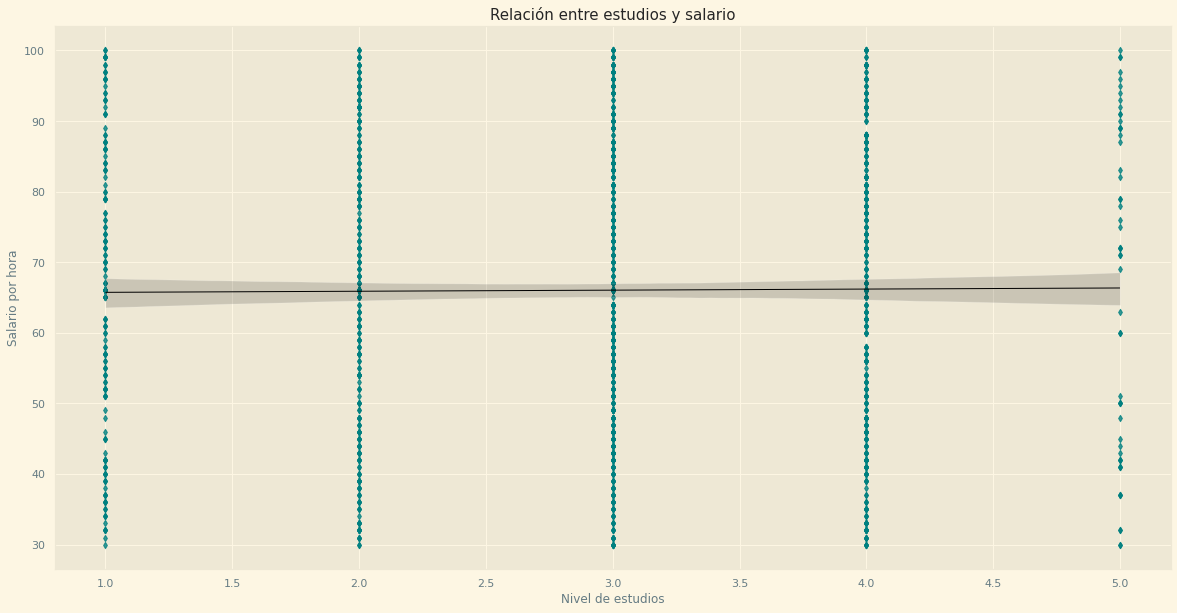

In [20]:
#fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
plt.figure(figsize=(20, 10))

sns.regplot(y = "hourly_rate", 
            x = "education", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 20}, # cambiamos el color y el tamaño de los puntos del scaterplot
            #ax = axes[0] # especificamos el eje en el que queremos poner la gráfica. En este caso en el eje 0. 
            );


# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.ylabel("Salario por hora", fontsize = 12)
plt.xlabel("Nivel de estudios", fontsize = 12)
# ponemos título a la gráfica
plt.title("Relación entre estudios y salario", fontsize = 15);


In [21]:
df["hourly_rate"].unique()

array([ 51.        ,  65.        ,  58.        ,  82.        ,
        45.        ,  99.        ,  91.        ,  64.        ,
        55.        ,  68.        ,  49.        ,  61.        ,
        79.        ,  31.        ,  69.        ,  48.        ,
        80.        ,  74.        ,  98.        ,  59.        ,
        33.        ,  56.        ,  66.        ,  57.        ,
        53.        ,  87.        ,  81.        ,  84.        ,
        32.        ,  41.        ,  92.        ,  47.        ,
        66.02810458,  43.        ,  86.        ,  30.        ,
        42.        ,  88.        ,  96.        ,  67.        ,
        62.        ,  72.        ,  78.        ,  89.        ,
        52.        ,  50.        ,  90.        ,  37.        ,
        94.        ,  76.        ,  60.        ,  46.        ,
        83.        , 100.        ,  40.        ,  97.        ,
        54.        ,  75.        ,  39.        ,  85.        ,
        63.        ,  44.        ,  93.        ,  36.  

Text(0.5, 1.0, 'Relación entre estudios, salario y antigüedad en la empresa')

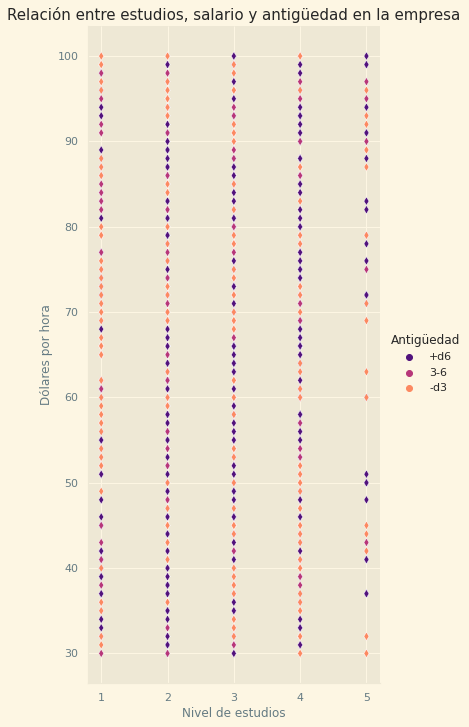

In [22]:
def asignar_color(years):
    if years <= 6:
        return '-d3' if years <= 3 else '3-6' if years <= 6 else '+6'
    else:
        return '+d6'
# Aplicar la función asignar_color a la columna 'years_at_company'
df['Antigüedad'] = df['years_at_company'].apply(asignar_color)
# Crear el gráfico utilizando el DataFrame modificado
sns.pairplot(data=df,
             x_vars=['education'],
             y_vars=['hourly_rate'],
             hue='Antigüedad',  # Usar la columna 'color' como la variable de color
             markers='d',
             palette='magma',
             height=10, aspect=0.5)
# Resto del código para personalizar el gráfico
plt.xlabel("Nivel de estudios", fontsize=12)
plt.ylabel("Dólares por hora", fontsize=12)
plt.title("Relación entre estudios, salario y antigüedad en la empresa", fontsize=15)

In [23]:
# Observamos que no hay una correspondencia entre el nivel educativo y el salario percibido.

# A/B Testing

<span style="color:#D4AF37">H0 - Hipótesis nula</span>: **No** existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos **no** tienen una mayor probabilidad de dejar la empresa

<span style="color:#D4AF37">H1 - Hipótesis alternativa</span> : Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa

In [24]:
def normalidad(dataframe, columna):
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [25]:
#Da error así que convierto Y = 1 y N = 0
df['attrition'] = df['attrition'].map({'Y': 1, 'N': 0})

In [26]:
metricas = ['attrition']

for metrica in metricas:
    normalidad(df ,metrica)

Para la columna attrition los datos no siguen una distribución normal.


Attrition no sigue una distribución normal  <span style="color:#D4AF37">¿Por qué? ¿Qué significa? Pues ni idea</span>

In [27]:
# Creamos función para evaluar la homogeneidad de las varianzas entre grupos para la métrica Attrition_num de nuestro df

def homogeneidad (dataframe, columna, columna_metrica):
     
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")

In [28]:
metricas = ['attrition']

for metrica in metricas:
    homogeneidad(df ,"job_satisfaction2", metrica)

Para la métrica attrition, las varianzas no son homogéneas entre grupos.


Las varianzas no son homogéneas

In [29]:
def chi2 (column1, column2):

    contingency_table = pd.crosstab(column1, column2)

    chi2, p_valor, _, _ = chi2_contingency(contingency_table)

    print("\nResultados del test de Chi-cuadrado:")
    print(f"Estadística de Chi-cuadrado: {chi2}")
    print(f"P-valor: {p_valor}")

    alpha = 0.05  
    if p_valor < alpha:
        print("\nPara la métrica de Attrition existe evidencia suficiente para rechazar la hipótesis nula.")
    else:
        print("\nNo hay suficiente evidencia para rechazar la hipótesis nula.")

In [30]:
chi2(df['attrition'], df['job_satisfaction2'])



Resultados del test de Chi-cuadrado:
Estadística de Chi-cuadrado: 10.441300351335348
P-valor: 0.0012322848438575645

Para la métrica de Attrition existe evidencia suficiente para rechazar la hipótesis nula.


¡Rechazamos la hipótesis nula! Es decir <span style="color:#D4AF37">Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa</span>

In [31]:
#Ahora quizá habría que hacer el Mann Whitney pero no tengo claro para qué